In [80]:
import os.path
import numpy as np
import requests
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aqi
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Excel file
air_quality = pd.read_excel("C:\\Nidhi\\predictive_analysis\\target\\air_quality.xlsx")

# View first 20 rows of the dataset
air_quality.head(20)

,locationId,date_utc,location,coordinates,country,city,co,o3,no2,so2,pm25,pm10
0,407,2016-03-21T18:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,3560.0,1.1,5.2,11.5,56.0,94.0
1,407,2016-03-22T00:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1860.0,0.1,2.8,28.2,56.0,94.0
2,407,2016-03-22T00:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1700.0,0.2,3.8,22.1,85.0,94.0
3,407,2016-03-22T00:45:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1600.0,0.9,4.2,20.6,85.0,94.0
4,407,2016-03-22T01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1490.0,0.4,3.2,18.9,85.0,94.0
5,407,2016-03-22T01:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1450.0,0.2,5.9,15.3,85.0,94.0
6,407,2016-03-22T01:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1390.0,0.9,2.6,15.6,73.0,94.0
7,407,2016-03-22T01:45:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1380.0,1.9,3.7,15.9,73.0,94.0
8,407,2016-03-22T02:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1340.0,2.4,1.0,16.6,73.0,94.0
9,407,2016-03-22T02:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1350.0,3.0,0.6,17.4,73.0,94.0


In [3]:
# Read last 20 rows of air quality dataset
air_quality.tail(20)

,locationId,date_utc,location,coordinates,country,city,co,o3,no2,so2,pm25,pm10
59008,407,2022-10-15T21:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,740.0,12.4,15.1,0.7,28.0,27.0
59009,407,2022-10-15T22:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,620.0,14.0,13.3,0.4,17.0,24.0
59010,407,2022-10-15T23:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,530.0,13.6,13.5,1.2,27.0,20.0
59011,407,2022-10-16T00:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,550.0,13.6,13.6,1.6,12.0,18.0
59012,407,2022-10-16T01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,480.0,13.7,12.8,2.0,17.0,18.0
59013,407,2022-10-16T03:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,500.0,13.3,13.5,1.7,31.0,33.0
59014,407,2022-10-16T04:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,250.0,15.0,13.5,1.6,21.0,41.0
59015,407,2022-10-16T06:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,630.0,14.1,14.1,245.2,27.0,40.0
59016,407,2022-10-16T07:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,650.0,13.7,12.4,1.7,25.0,58.0
59017,407,2022-10-16T08:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,660.0,15.0,15.3,2.1,28.0,53.0


In [4]:
# check structure
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59028 entries, 0 to 59027
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   locationId   59028 non-null  int64  
 1   date_utc     59028 non-null  object 
 2   location     59028 non-null  object 
 3   coordinates  59028 non-null  object 
 4   country      59028 non-null  object 
 5   city         0 non-null      float64
 6   co           58985 non-null  float64
 7   o3           54143 non-null  float64
 8   no2          58624 non-null  float64
 9   so2          58994 non-null  float64
 10  pm25         57115 non-null  float64
 11  pm10         53654 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 5.4+ MB


In [5]:
# convert date into datetime type
air_quality['date_utc'] = pd.to_datetime(air_quality['date_utc'])
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59028 entries, 0 to 59027
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   locationId   59028 non-null  int64              
 1   date_utc     59028 non-null  datetime64[ns, UTC]
 2   location     59028 non-null  object             
 3   coordinates  59028 non-null  object             
 4   country      59028 non-null  object             
 5   city         0 non-null      float64            
 6   co           58985 non-null  float64            
 7   o3           54143 non-null  float64            
 8   no2          58624 non-null  float64            
 9   so2          58994 non-null  float64            
 10  pm25         57115 non-null  float64            
 11  pm10         53654 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1), object(3)
memory usage: 5.4+ MB


In [6]:
# descriptive analysis
air_quality.describe(include= "all", datetime_is_numeric=True)

,locationId,date_utc,location,coordinates,country,city,co,o3,no2,so2,pm25,pm10
count,59028.0,59028,59028,59028,59028,0.0,58985.000000,54143.000000,58624.000000,58994.000000,57115.000000,53654.000000
unique,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,59028,59028,59028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,407.0,2019-02-09 04:05:30.021345792+00:00,NaN,NaN,NaN,NaN,965.392727,37.176880,46.311284,10.182086,48.164773,95.671357
min,407.0,2016-03-21 18:30:00+00:00,NaN,NaN,NaN,NaN,-4720.000000,-7.400000,-20.000000,-6.600000,0.000000,0.000000
25%,407.0,2017-04-09 18:00:00+00:00,NaN,NaN,NaN,NaN,350.000000,16.500000,16.200000,1.500000,25.000000,55.000000
50%,407.0,2019-08-25 07:22:30+00:00,NaN,NaN,NaN,NaN,630.000000,23.100000,32.800000,3.300000,48.000000,94.000000
75%,407.0,2020-03-15 05:48:45+00:00,NaN,NaN,NaN,NaN,980.000000,37.600000,49.500000,5.600000,71.000000,132.000000
max,407.0,2022-10-31 02:00:00+00:00,NaN,NaN,NaN,NaN,106000.000000,67251.500000,17646.600000,4269.300000,387.000000,698.000000


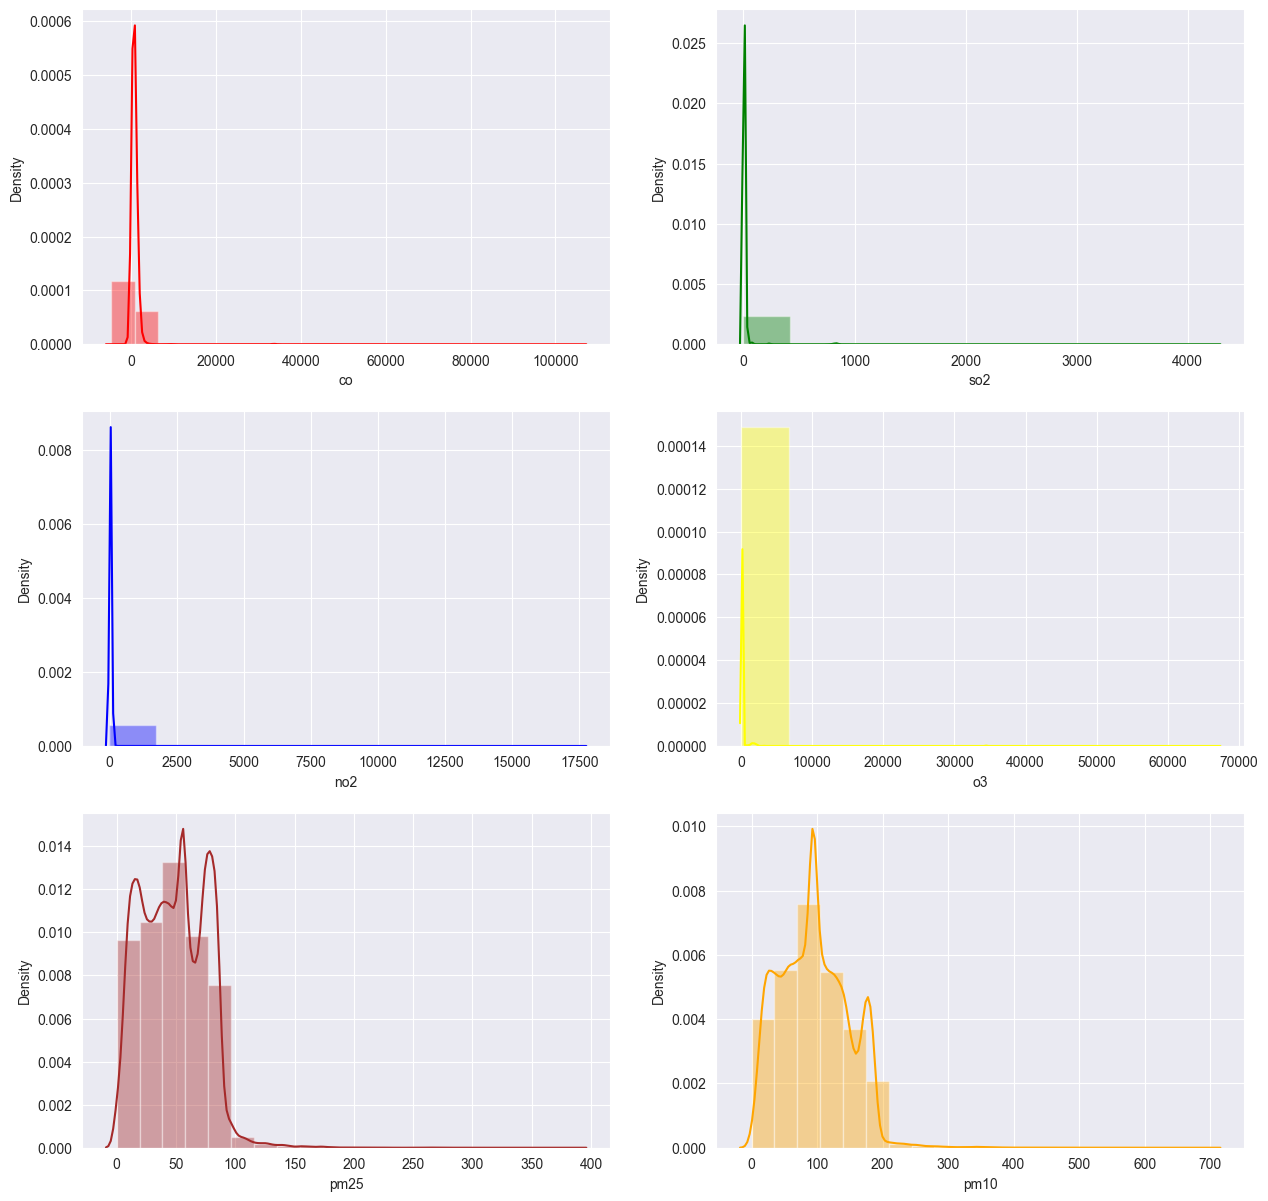

In [7]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(air_quality['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(air_quality['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(air_quality['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(air_quality['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(air_quality['pm25'],bins = 20,color = 'brown')
plt.subplot(4,2,6)
sns.distplot(air_quality['pm10'],bins = 20,color = 'orange')
plt.show()

In [8]:

# Assuming 'date' column is in datetime format
air_quality['year'] = air_quality['date_utc'].dt.year


In [20]:
# copy dataset
aq_aqi = air_quality.copy()
aq_aqi.head()

,locationId,date_utc,location,coordinates,country,city,co,o3,no2,so2,pm25,pm10,year
0,407,2016-03-21 18:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,3560.0,1.1,5.2,11.5,56.0,94.0,2016
1,407,2016-03-22 00:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1860.0,0.1,2.8,28.2,56.0,94.0,2016
2,407,2016-03-22 00:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1700.0,0.2,3.8,22.1,85.0,94.0,2016
3,407,2016-03-22 00:45:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1600.0,0.9,4.2,20.6,85.0,94.0,2016
4,407,2016-03-22 01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,NaN,1490.0,0.4,3.2,18.9,85.0,94.0,2016


In [21]:
aq_aqi.isna().sum()

locationId         0
date_utc           0
location           0
coordinates        0
country            0
city           59028
co                43
o3              4885
no2              404
so2               34
pm25            1913
pm10            5374
year               0
dtype: int64

In [22]:
aq_aqi = aq_aqi.drop('city', axis=1)
aq_aqi.head()

,locationId,date_utc,location,coordinates,country,co,o3,no2,so2,pm25,pm10,year
0,407,2016-03-21 18:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,3560.0,1.1,5.2,11.5,56.0,94.0,2016
1,407,2016-03-22 00:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1860.0,0.1,2.8,28.2,56.0,94.0,2016
2,407,2016-03-22 00:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1700.0,0.2,3.8,22.1,85.0,94.0,2016
3,407,2016-03-22 00:45:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1600.0,0.9,4.2,20.6,85.0,94.0,2016
4,407,2016-03-22 01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1490.0,0.4,3.2,18.9,85.0,94.0,2016


In [23]:
aq_df = aq_aqi.dropna()


In [24]:
aq_df.isna().sum()

locationId     0
date_utc       0
location       0
coordinates    0
country        0
co             0
o3             0
no2            0
so2            0
pm25           0
pm10           0
year           0
dtype: int64

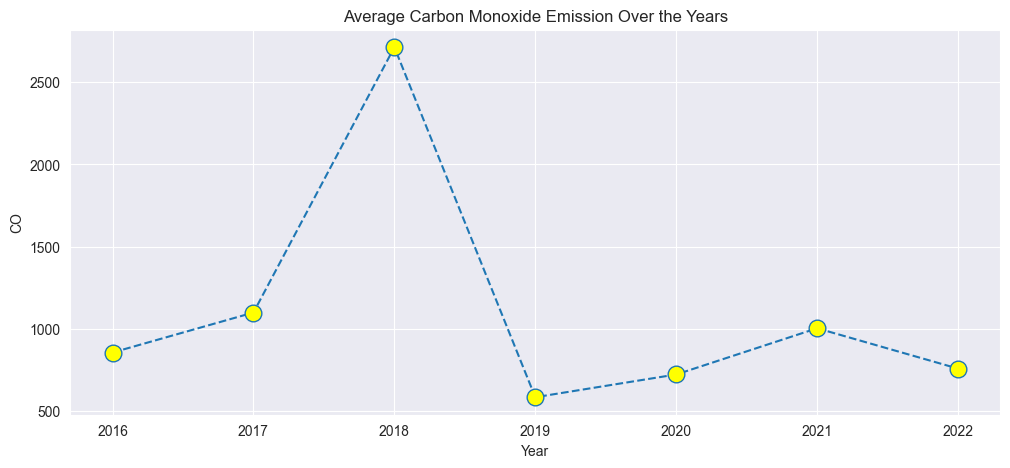

In [26]:
# Group by Crop_Year and calculate the mean yield for each year
yearly_aq = aq_df.groupby('year').mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_aq['year'], yearly_aq['co'], linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='yellow')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO')
plt.title('Average Carbon Monoxide Emission Over the Years')

# Show the plot
plt.show()

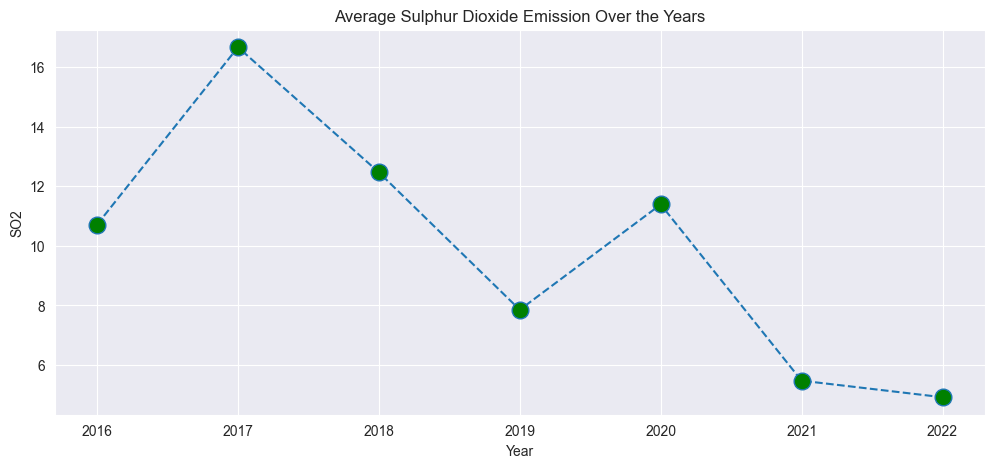

In [27]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_aq['year'], yearly_aq['so2'], linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('SO2')
plt.title('Average Sulphur Dioxide Emission Over the Years')

# Show the plot
plt.show()

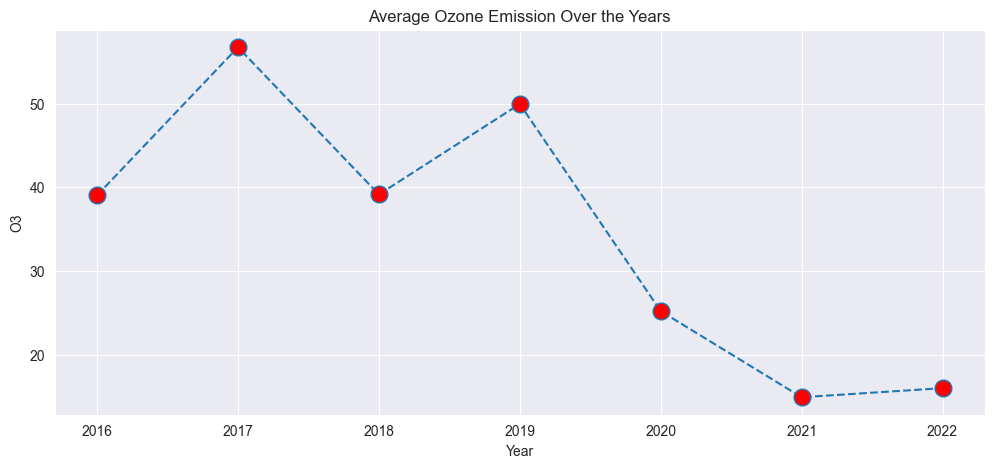

In [28]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_aq['year'], yearly_aq['o3'], linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('O3')
plt.title('Average Ozone Emission Over the Years')

# Show the plot
plt.show()

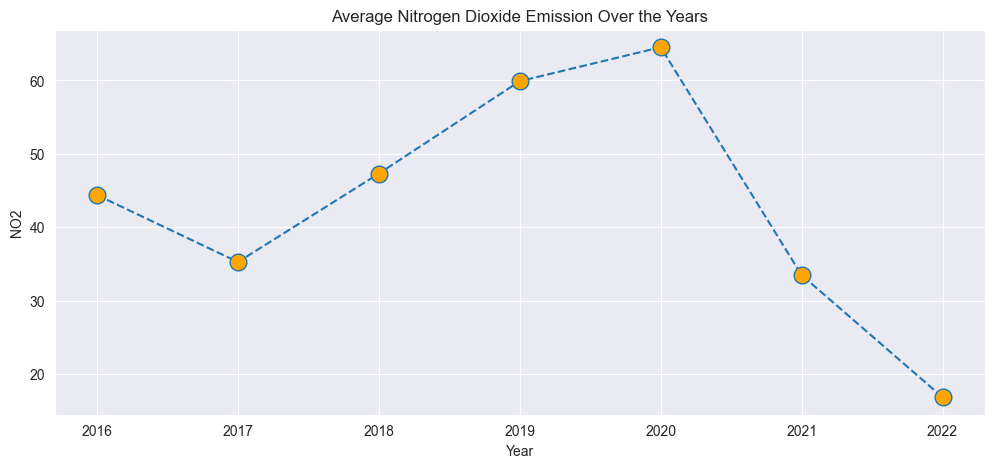

In [29]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_aq['year'], yearly_aq['no2'], linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='orange')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('NO2')
plt.title('Average Nitrogen Dioxide Emission Over the Years')

# Show the plot
plt.show()

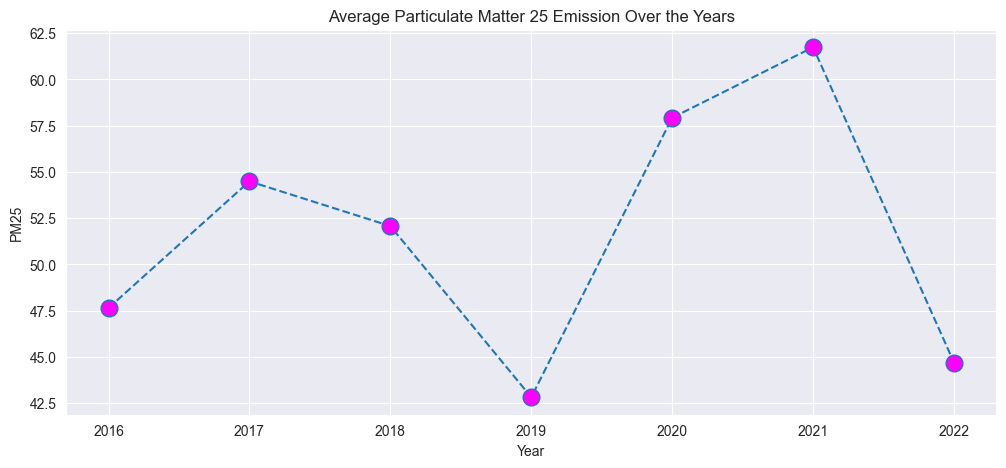

In [30]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_aq['year'], yearly_aq['pm25'], linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='magenta')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PM25')
plt.title('Average Particulate Matter 25 Emission Over the Years')

# Show the plot
plt.show()

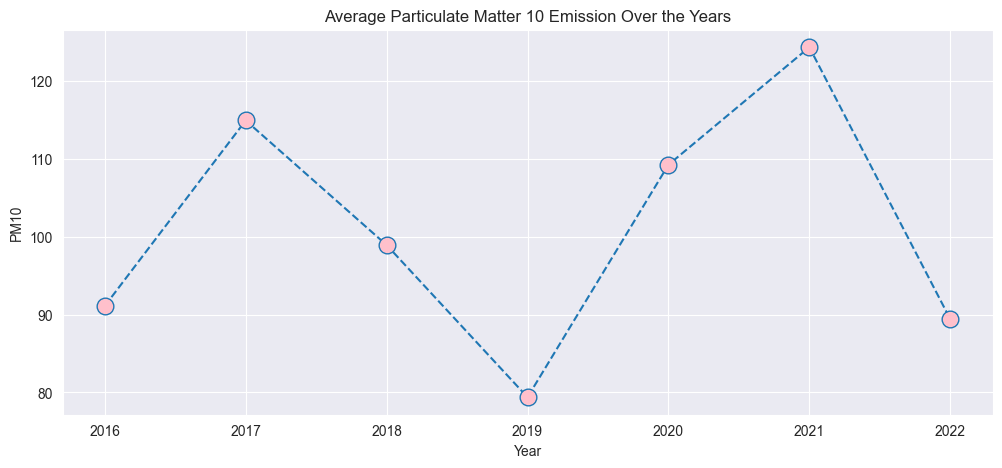

In [31]:
# Set the size of the plot
plt.figure(figsize=(12, 5))

# Plotting
plt.plot(yearly_aq['year'], yearly_aq['pm10'], linestyle='dashed', marker='o',
         markersize=12, markerfacecolor='pink')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('PM10')
plt.title('Average Particulate Matter 10 Emission Over the Years')

# Show the plot
plt.show()

<Axes: >

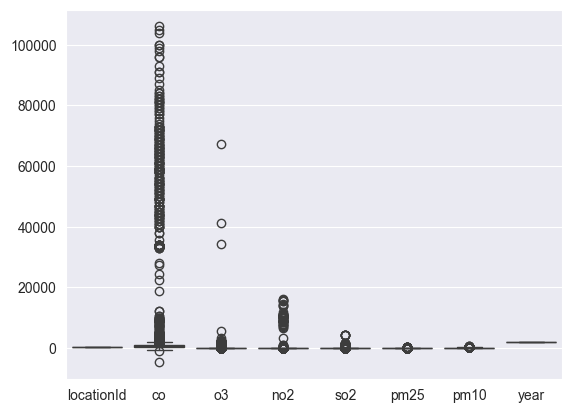

In [32]:
# boxplot
sns.boxplot(aq_df)


<Axes: ylabel='so2'>

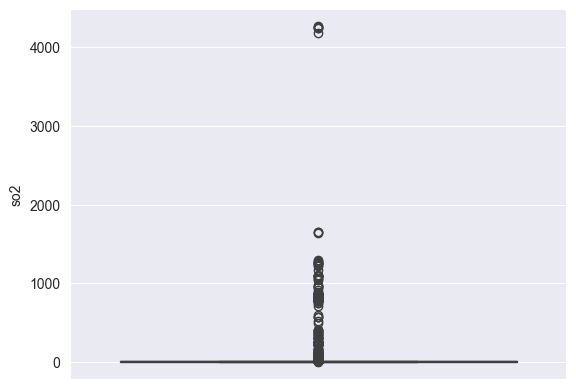

In [33]:
# Checking outliers
sns.boxplot(aq_df.so2)

In [34]:
# removing outliers
aq_df['so2'] = winsorize(aq_df['so2'], limits=[0.01, 0.01])

<Axes: ylabel='so2'>

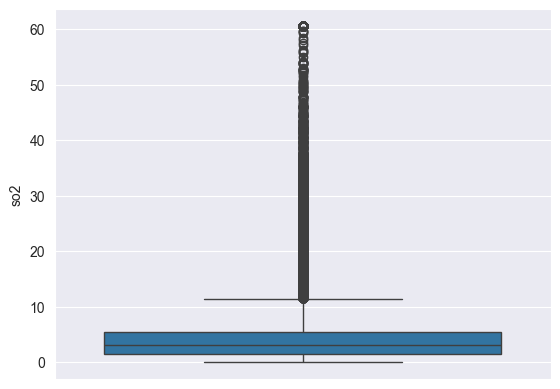

In [35]:
# boxplot for so2 after removal of outliers
sns.boxplot(aq_df.so2)

<Axes: ylabel='no2'>

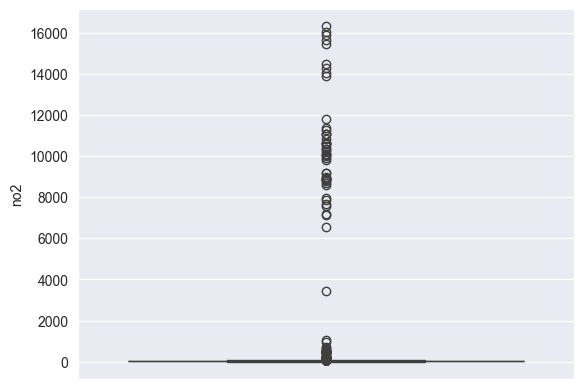

In [36]:
# Checking outliers
sns.boxplot(aq_df.no2)

In [37]:
# removing outliers
aq_df['no2'] = winsorize(aq_df['no2'], limits=[0.01, 0.01])

<Axes: ylabel='no2'>

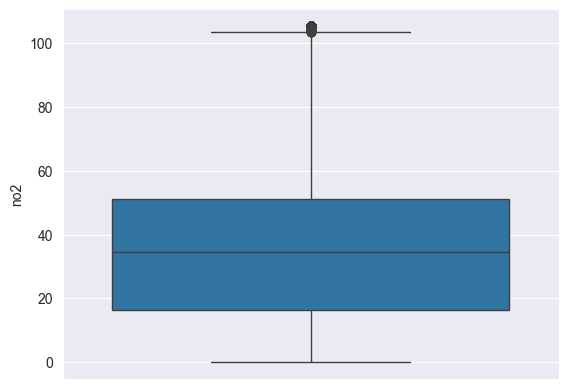

In [38]:
# boxplot for no2 after removal of outliers
sns.boxplot(aq_df.no2)

<Axes: ylabel='co'>

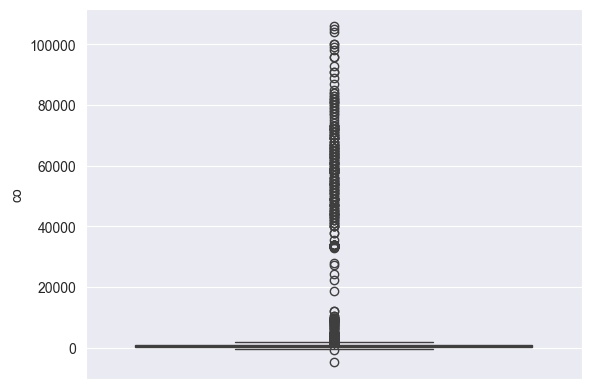

In [39]:
# Checking outliers
sns.boxplot(aq_df.co)

In [40]:
# removing outliers
aq_df['co'] = winsorize(aq_df['co'], limits=[0.01, 0.01])

<Axes: ylabel='co'>

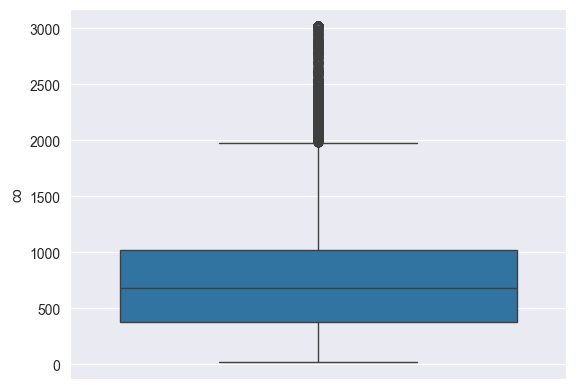

In [41]:
# boxplot for no2 after removal of outliers
sns.boxplot(aq_df.co)

<Axes: ylabel='o3'>

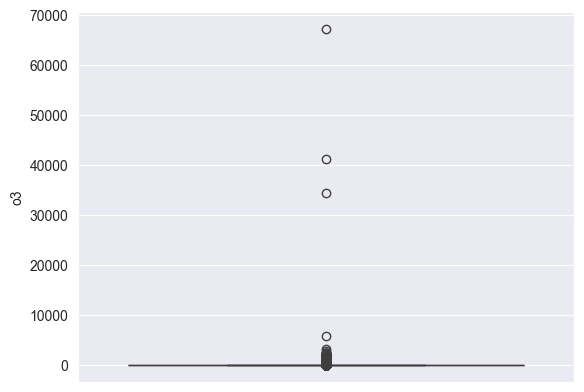

In [42]:
sns.boxplot(aq_df.o3)

In [43]:
# removing outliers
aq_df['o3'] = winsorize(aq_df['o3'], limits=[0.1, 0.1])

<Axes: ylabel='o3'>

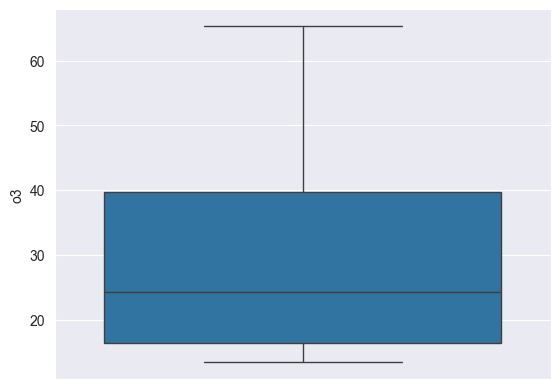

In [44]:
# boxplot for no2 after removal of outliers
sns.boxplot(aq_df.o3)

<Axes: ylabel='pm10'>

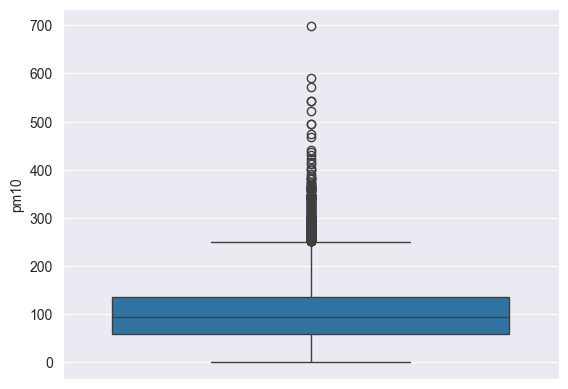

In [45]:
# checking outliers
sns.boxplot(aq_df.pm10)

In [46]:
# removing outliers
aq_df['pm10'] = winsorize(aq_df['pm10'], limits=[0.1, 0.1])

<Axes: ylabel='pm10'>

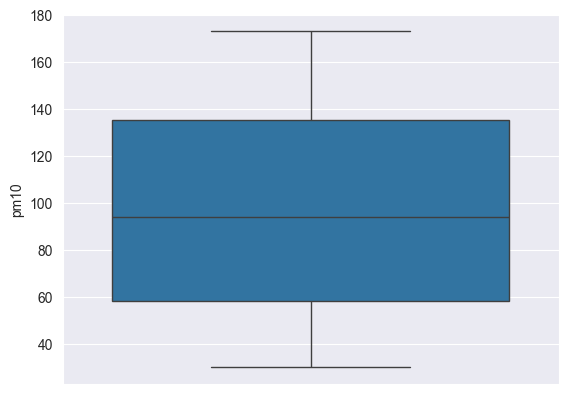

In [47]:
# boxplot for no2 after removal of outliers
sns.boxplot(aq_df.pm10)

<Axes: ylabel='pm25'>

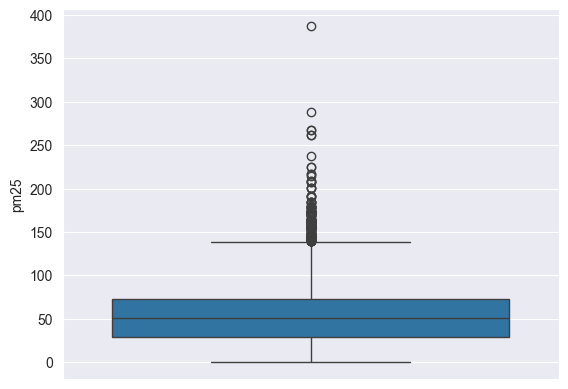

In [48]:
# checking outliers
sns.boxplot(aq_df.pm25)

In [49]:
# removing outliers
aq_df['pm25'] = winsorize(aq_df['pm25'], limits=[0.04, 0.04])

<Axes: ylabel='pm25'>

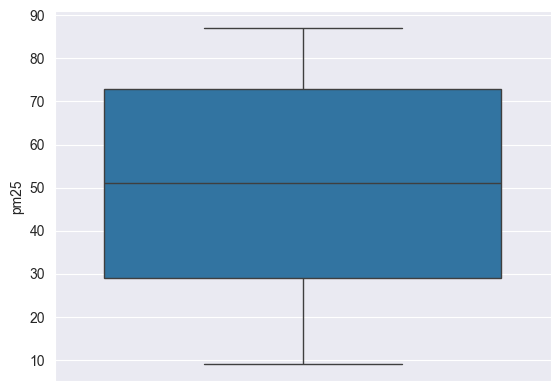

In [50]:
# boxplot for no2 after removal of outliers
sns.boxplot(aq_df.pm25)

<Axes: >

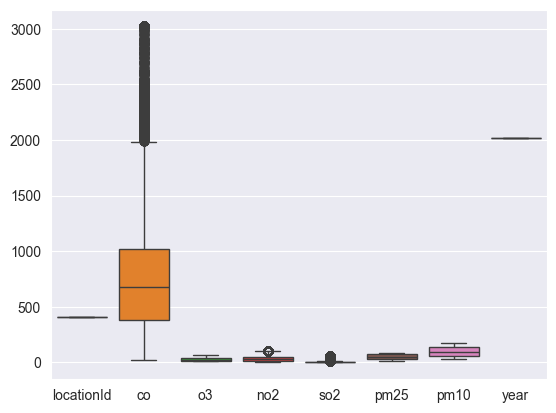

In [51]:
sns.boxplot(aq_df)

In [52]:
aq_df['locationId'] = aq_df['locationId'].astype('category')

<Axes: >

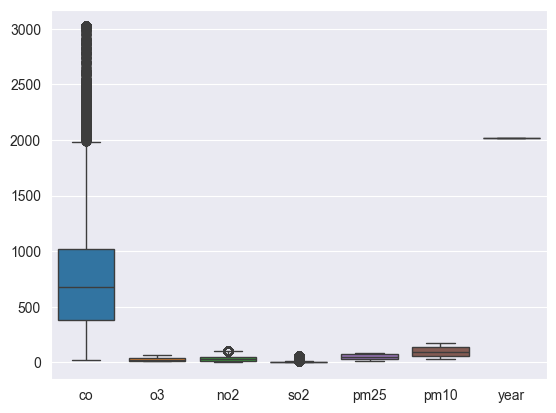

In [53]:
# boxplot
sns.boxplot(aq_df)

In [54]:
aq_df.isnull().sum()

locationId     0
date_utc       0
location       0
coordinates    0
country        0
co             0
o3             0
no2            0
so2            0
pm25           0
pm10           0
year           0
dtype: int64

In [55]:
aq_df.duplicated().sum()

0

In [56]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400)
    ]

In [57]:
def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

In [58]:
def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no2', 'o3', 'so2', 'pm25', 'pm10']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

In [59]:
# Calculate AQI for each row
aq_df['AQI'] = aq_df.apply(calculate_overall_aqi, axis=1)

In [60]:
# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]


In [61]:
def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

In [62]:
# Categorize AQI
aq_df['AQI_Category'] = aq_df['AQI'].apply(categorize_aqi)
aq_df

,locationId,date_utc,location,coordinates,country,co,o3,no2,so2,pm25,pm10,year,AQI,AQI_Category
0,407,2016-03-21 18:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,3020.0,13.5,5.2,11.5,56.0,94.0,2016,200,Unhealthy
1,407,2016-03-22 00:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1860.0,13.5,2.8,28.2,56.0,94.0,2016,200,Unhealthy
2,407,2016-03-22 00:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1700.0,13.5,3.8,22.1,85.0,94.0,2016,200,Unhealthy
3,407,2016-03-22 00:45:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1600.0,13.5,4.2,20.6,85.0,94.0,2016,200,Unhealthy
4,407,2016-03-22 01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1490.0,13.5,3.2,18.9,85.0,94.0,2016,200,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59023,407,2022-10-16 14:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1130.0,13.5,18.4,5.1,36.0,43.0,2022,150,Unhealthy for Sensitive Groups
59024,407,2022-10-16 15:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1100.0,14.2,17.8,2.4,49.0,61.0,2022,200,Unhealthy
59025,407,2022-10-16 16:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1040.0,13.7,16.8,1.5,39.0,63.0,2022,200,Unhealthy
59026,407,2022-10-31 01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,960.0,13.5,18.6,0.0,86.0,145.0,2022,200,Unhealthy


In [63]:
aq_df['AQI_Category'].value_counts()

Unhealthy                         27264
Very Unhealthy                    12366
Hazardous                          3487
Unhealthy for Sensitive Groups     2702
Moderate                           1261
Name: AQI_Category, dtype: int64

<Axes: xlabel='count', ylabel='AQI_Category'>

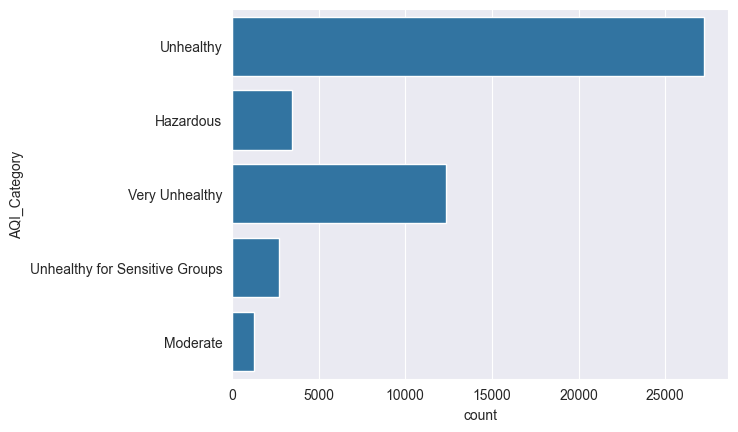

In [134]:
sns.countplot(y='AQI_Category', data=aq_df)

In [151]:
air_new = aq_df.copy()
air_new.head()

,locationId,date_utc,location,coordinates,country,co,o3,no2,so2,pm25,pm10,year,AQI,AQI_Category
0,407,2016-03-21 18:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,3020.0,13.5,5.2,11.5,56.0,94.0,2016,200,Unhealthy
1,407,2016-03-22 00:15:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1860.0,13.5,2.8,28.2,56.0,94.0,2016,200,Unhealthy
2,407,2016-03-22 00:30:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1700.0,13.5,3.8,22.1,85.0,94.0,2016,200,Unhealthy
3,407,2016-03-22 00:45:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1600.0,13.5,4.2,20.6,85.0,94.0,2016,200,Unhealthy
4,407,2016-03-22 01:00:00+00:00,"Zoo Park, Hyderabad - TSPCB","{'latitude': 17.349694, 'longitude': 78.451437}",IN,1490.0,13.5,3.2,18.9,85.0,94.0,2016,200,Unhealthy


In [152]:
# drop columns
air_new.drop(['locationId', 'location', 'date_utc', 'coordinates', 'country', 'year', 'pm10' ],inplace=True, axis =1)

In [153]:
# view new cleaned dataset
air_new.head()

,co,o3,no2,so2,AQI,AQI_Category
0,3020.0,13.5,5.2,11.5,200,Unhealthy
1,1860.0,13.5,2.8,28.2,200,Unhealthy
2,1700.0,13.5,3.8,22.1,200,Unhealthy
3,1600.0,13.5,4.2,20.6,200,Unhealthy
4,1490.0,13.5,3.2,18.9,200,Unhealthy


In [154]:
# creating instances
ode =  OrdinalEncoder()
scaler = PowerTransformer(method='yeo-johnson')

In [155]:
# column transformer
ct = make_column_transformer(
    (ode, ['AQI_Category']),
    (scaler, ['co', 'o3', 'no2', 'so2', 'pm25', 'AQI']),
    remainder= 'passthrough')


In [156]:
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['AQI_Category']),
                                ('powertransformer', PowerTransformer(),
                                 ['co', 'o3', 'no2', 'so2', 'AQI'])])

In [157]:
# fit transform
air_new_df = ct.fit_transform(air_new)

In [158]:
# Get original column names
original_columns = ['AQI_Category', 'co', 'o3', 'no2', 'so2', 'pm25', 'AQI']


In [159]:
# Rename the columns in the resulting DataFrame
air_new_df.columns = original_columns

In [160]:
# view dataset
air_new_df.head()

,AQI_Category,co,o3,no2,so2,AQI
0,2.0,2.853400,-1.427266,-1.610276,1.245395,-0.430057
1,2.0,1.741724,-1.427266,-1.866885,1.945255,-0.430057
2,2.0,1.559127,-1.427266,-1.752578,1.767496,-0.430057
3,2.0,1.439884,-1.427266,-1.710097,1.714487,-0.430057
4,2.0,1.303604,-1.427266,-1.819614,1.648466,-0.430057


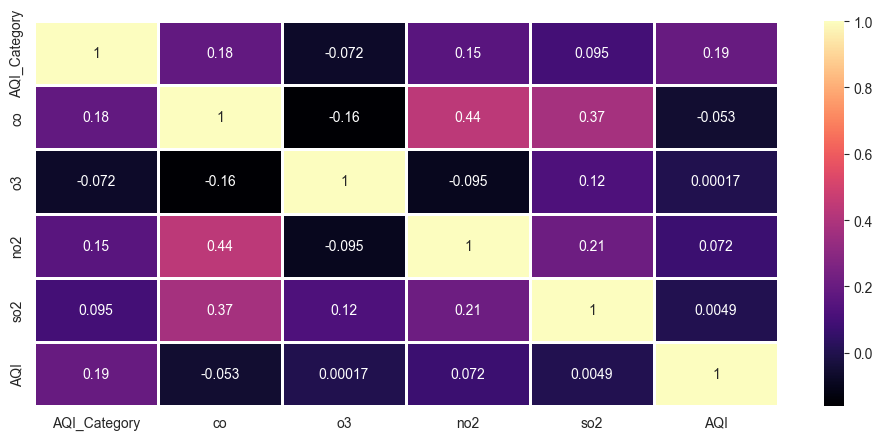

In [169]:
# Calculate the correlation coefficients
plt.figure(figsize = [12, 5], facecolor = 'white')
sns.heatmap(air_new_df.corr(), annot = True, linewidths = 2, cmap = "magma");

# Dataset split

In [162]:
# feature matrix and target variable
X =  air_new_df.drop(columns=['AQI_Category'])
y = air_new_df['AQI_Category']

In [163]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [164]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37664, 5)
X_test shape: (9416, 5)
y_train shape: (37664,)
y_test shape: (9416,)


KeyError: 'pm25'

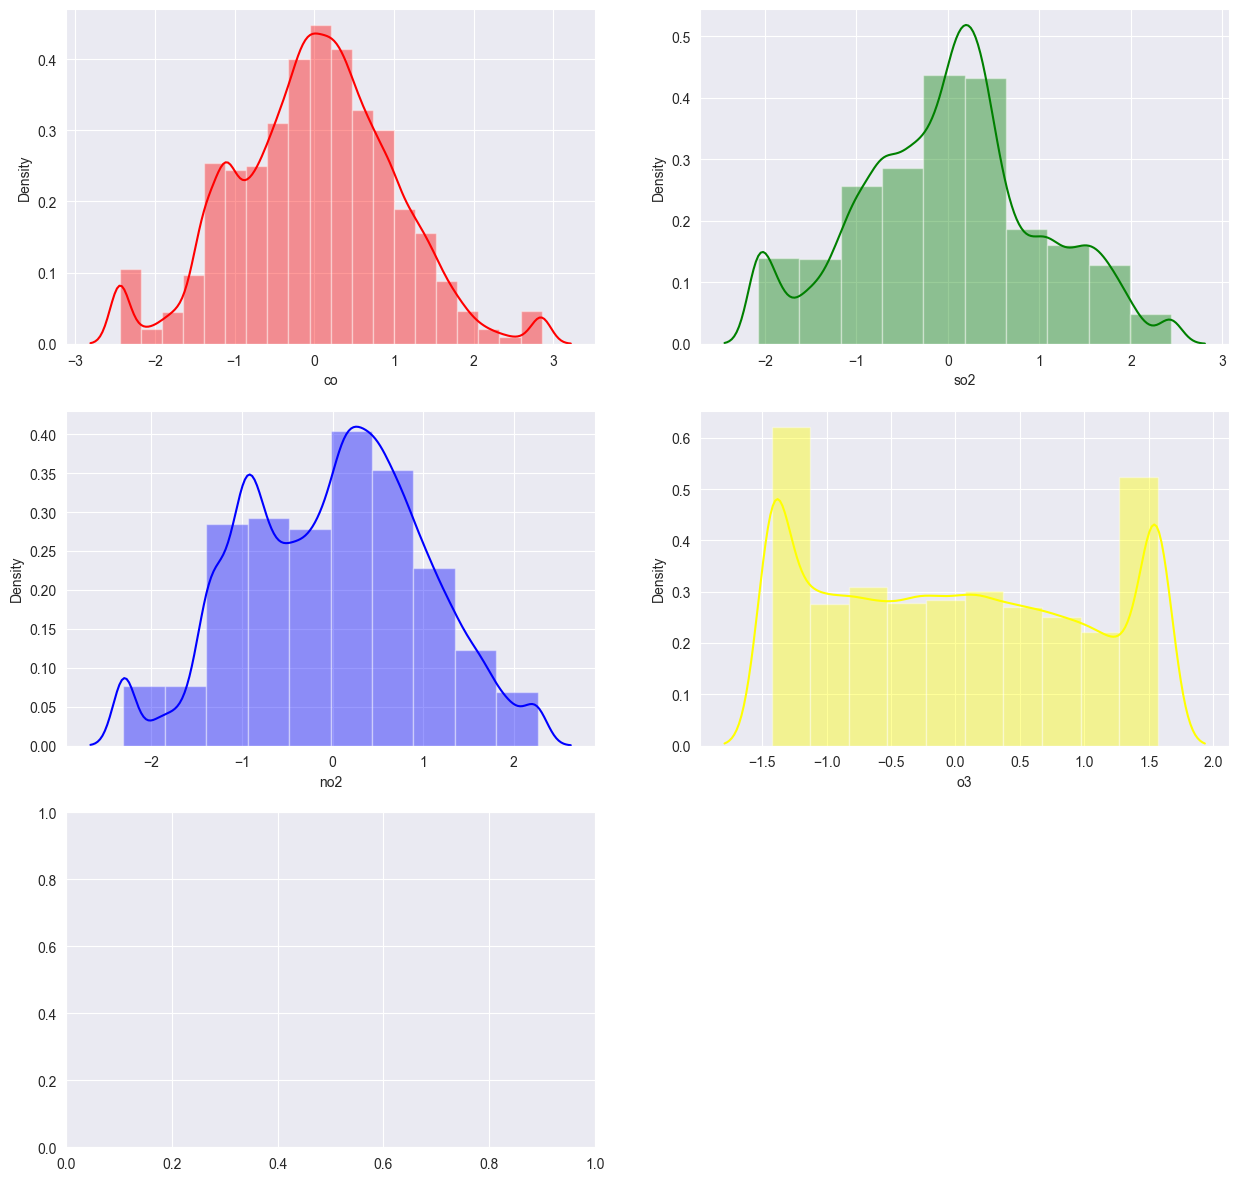

In [165]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(X_train['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(X_train['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(X_train['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(X_train['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(X_train['pm25'],bins = 20,color = 'brown')
plt.subplot(4,2,6)
sns.distplot(X_train['pm10'],bins = 20,color = 'orange')
plt.show()

# Random Forest Classifier


In [166]:
# Use 'balanced' class weights in the classifier
rf_model = RandomForestClassifier(n_estimators=100,

                                  random_state=123,
                                  max_depth=10)

# Train the classifier on the training set
rf_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
rf_model.score(X_test, y_test)



1.0

In [167]:
# Random Oversampling
rf_pipeline = make_pipeline(SMOTE(), rf_model)

# Step 3: Train your model using the training set with oversampling or undersampling
rf_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
yrf_pred = rf_pipeline.predict(X_test)

# Step 5: Evaluate model performance
s_accuracy = accuracy_score(y_test, yrf_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 1.0


In [90]:
# Create learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# SVM

In [117]:
# Create an SVM classifier with balanced class weights
svm_model = SVC(class_weight='balanced', probability=True)

# Train the classifier on the training set
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       702
         1.0       1.00      1.00      1.00       258
         2.0       1.00      1.00      1.00      5451
         3.0       1.00      1.00      1.00       497
         4.0       1.00      1.00      1.00      2508

    accuracy                           1.00      9416
   macro avg       1.00      1.00      1.00      9416
weighted avg       1.00      1.00      1.00      9416


In [129]:
# Random Oversampling
svm_pipeline = make_pipeline(SMOTE(), svm_model)

# Step 3: Train your model using the training set with oversampling or undersampling
svm_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ysvm_pred = svm_pipeline.predict(X_test)

# Step 5: Evaluate model performance
svm_accuracy = accuracy_score(y_test, ysvm_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 0.9995751911639762


# Gaussian Naive's Bayes

In [121]:
# Use 'balanced' class weights in the classifier
nb_model = GaussianNB()

# Train the classifier on the training set
nb_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
nb_model.score(X_test, y_test)

1.0

In [122]:
# Random Oversampling
nb_pipeline = make_pipeline(SMOTE(), nb_model)

# Step 3: Train your model using the training set with oversampling or undersampling
nb_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ynb_pred = nb_pipeline.predict(X_test)

# Step 5: Evaluate model performance
nb_accuracy = accuracy_score(y_test, ynb_pred)
print(f"Model Accuracy: {s_accuracy}")

Model Accuracy: 1.0


# KNN

In [168]:
# Use 'balanced' class weights in the classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
knn_model.score(X_test, y_test)

0.9997875955819882

In [125]:
# Random Oversampling
knn_pipeline = make_pipeline(SMOTE(), knn_model)

# Step 3: Train your model using the training set with oversampling or undersampling
knn_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
yknn_pred = knn_pipeline.predict(X_test)

# Step 5: Evaluate model performance
knn_accuracy = accuracy_score(y_test, yknn_pred)
print(f"Model Accuracy: {knn_accuracy}")

Model Accuracy: 0.9995751911639762


# MLP Classifier

In [126]:
# Use 'balanced' class weights in the classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=123)

# Train the classifier on the training set
mlp_model.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
mlp_model.score(X_test, y_test)

1.0

In [128]:
# Random Oversampling
mlp_pipeline = make_pipeline(SMOTE(), mlp_model)

# Step 3: Train your model using the training set with oversampling or undersampling
mlp_pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
ymlp_pred = mlp_pipeline.predict(X_test)

# Step 5: Evaluate model performance
mlp_accuracy = accuracy_score(y_test, ymlp_pred)
print(f"Model Accuracy: {mlp_accuracy}")

Model Accuracy: 1.0


#  Ensemble - Voting Classifier

In [130]:
# Create a Voting Classifier with the individual classifiers as meta classifier
v_clf = VotingClassifier(estimators=[('rf', rf_pipeline),
                                     ('svm', svm_pipeline),
                                     ('nb', nb_pipeline),
                                     ('knn', knn_pipeline),
                                     ('mlp',mlp_pipeline)])

# Train the classifier on the training set
v_clf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
v_clf.score(X_test, y_test)

1.0

# Cross Validation

In [131]:
# Perform cross-validation
v_cv_scores = cross_val_score(v_clf, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {v_cv_scores}')
print(f'Mean CV Score: {v_cv_scores.mean()}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [132]:
# calculate precision scores
precision_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='precision_macro')
print("Precision Scores:", precision_scores, "\n")
print("Mean Precision:", precision_scores.mean())

Precision Scores: [1. 1. 1. 1. 1.] 

Mean Precision: 1.0


In [88]:
# calculate recall scores
recall_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='recall_macro')
print("Recall Scores:", recall_scores, "\n")
print("Mean Recall:", recall_scores.mean())

Recall Scores: [1. 1. 1. 1. 1.] 

Mean Recall: 1.0


In [89]:
# calculate f1 scores
f1_scores = cross_val_score(v_clf, X_train, y_train, cv=5,
                                   scoring='f1_macro')
print("F1 Scores:", f1_scores, "\n")
print("Mean F1:", f1_scores.mean())

F1 Scores: [1. 1. 1. 1. 1.] 

Mean F1: 1.0


Confusion Matrix:
[[ 702    0    0    0    0]
 [   0  258    0    0    0]
 [   0    0 5451    0    0]
 [   0    0    0  497    0]
 [   0    0    0    0 2508]]


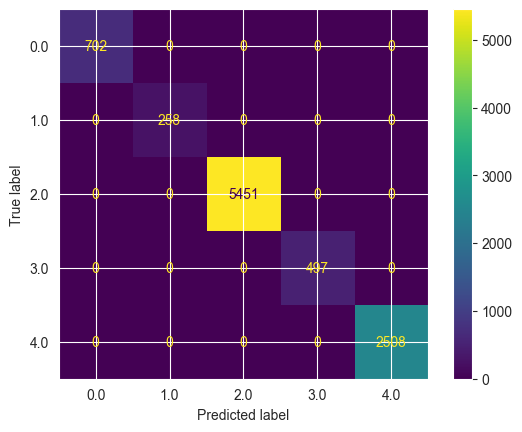

In [133]:
# Make predictions
vot_pred = v_clf.predict(X_test)

# Evaluate the model
vot_conf_mat = confusion_matrix(y_test, vot_pred, labels= v_clf.classes_)
print("Confusion Matrix:")
print(vot_conf_mat)

# display confusion matrix
vot_disp = ConfusionMatrixDisplay(confusion_matrix = vot_conf_mat,
                                 display_labels = v_clf.classes_
                                 )
vot_disp.plot()
plt.show()